<a href="https://www.kaggle.com/code/rajveerrathod/medicalqna-minichat?scriptVersionId=156669632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comprehensive-medical-q-a-dataset/train.csv


# Dataset Analysis


In [118]:
medic_data =  pd.read_csv("/kaggle/input/comprehensive-medical-q-a-dataset/train.csv")

In [119]:
df = pd.DataFrame(medic_data)

In [120]:
df

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."
...,...,...,...
16402,symptoms,What are the symptoms of Familial visceral myo...,What are the signs and symptoms of Familial vi...
16403,information,What is (are) Pseudopelade of Brocq ?,Pseudopelade of Brocq (PBB) is a slowly progre...
16404,symptoms,What are the symptoms of Pseudopelade of Brocq ?,What are the signs and symptoms of Pseudopelad...
16405,treatment,What are the treatments for Pseudopelade of Br...,Is there treatment or a cure for pseudopelade ...


In [121]:
df.head()

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


In [122]:
df.tail()

,qtype,Question,Answer
16402,symptoms,What are the symptoms of Familial visceral myo...,What are the signs and symptoms of Familial vi...
16403,information,What is (are) Pseudopelade of Brocq ?,Pseudopelade of Brocq (PBB) is a slowly progre...
16404,symptoms,What are the symptoms of Pseudopelade of Brocq ?,What are the signs and symptoms of Pseudopelad...
16405,treatment,What are the treatments for Pseudopelade of Br...,Is there treatment or a cure for pseudopelade ...
16406,information,What is (are) Desmoplastic small round cell tu...,"Desmoplastic small round cell tumors (DSRCT), ..."


In [123]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [124]:
df = pd.DataFrame(medic_data)
all_symptoms_text = ' '.join(df['qtype'])

# Tokenize the text
tokens = word_tokenize(all_symptoms_text)

# Remove stop words and non-alphabetic tokens
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
fdist = FreqDist(filtered_tokens)

# Display the most common symptoms
print(fdist.most_common(10))

[('information', 4535), ('symptoms', 2748), ('treatment', 2442), ('inheritance', 1446), ('frequency', 1120), ('genetic', 1087), ('changes', 1087), ('causes', 727), ('exams', 653), ('tests', 653)]


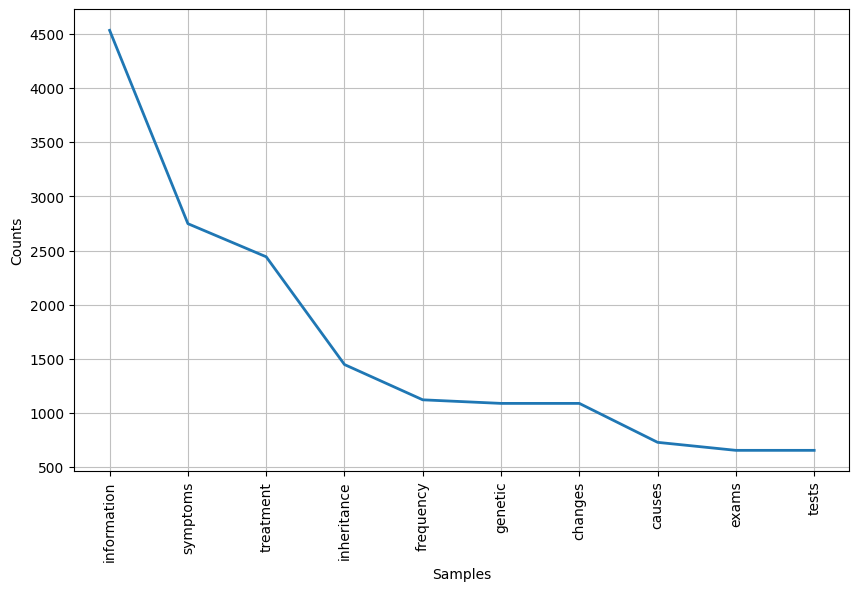

In [125]:
import matplotlib.pyplot as plt

# Plot the top N most common symptoms
N = 10
plt.figure(figsize=(10, 6))
fdist.plot(N, cumulative=False)
plt.show()


        Symptom  Frequency
7   information       4535
1      symptoms       2748
5     treatment       2442
14  inheritance       1446
8     frequency       1120
17      changes       1087
16      genetic       1087
10       causes        727
2         exams        653
3           and        653


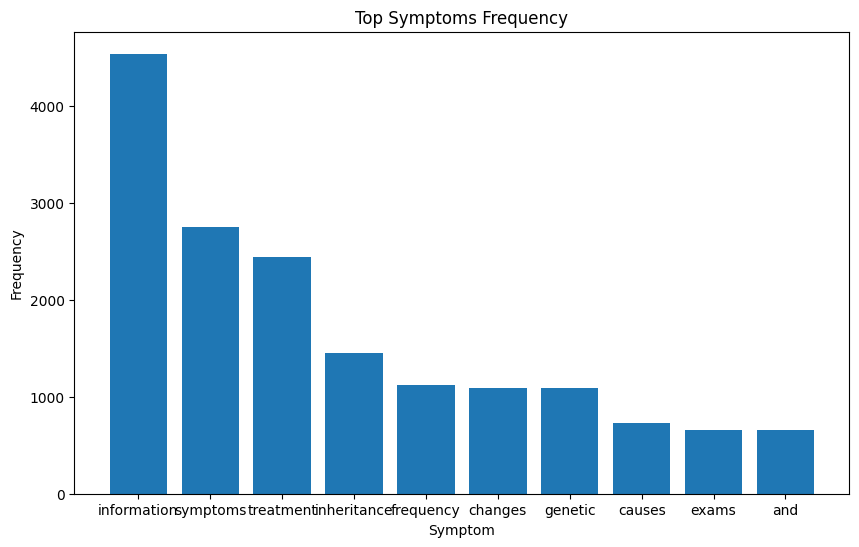

In [126]:
from collections import Counter
import matplotlib.pyplot as plt

symptoms_column = df['qtype']

# Concatenate symptoms strings into a single string
all_symptoms = ' '.join(symptoms_column.fillna(''))

# Tokenize the string into individual symptoms
symptoms_tokens = all_symptoms.split()

# Count the occurrences of each symptom using Counter
symptom_counts = Counter(symptoms_tokens)

# Create a DataFrame from the Counter results
symptom_counts_df = pd.DataFrame(list(symptom_counts.items()), columns=['Symptom', 'Frequency'])

# Sort the DataFrame by frequency
symptom_counts_df = symptom_counts_df.sort_values(by='Frequency', ascending=False)

# Display the top N symptoms
top_n = 10
print(symptom_counts_df.head(top_n))

# Plot the top N symptoms
plt.figure(figsize=(10, 6))
plt.bar(symptom_counts_df['Symptom'][:top_n], symptom_counts_df['Frequency'][:top_n])
plt.title('Top Symptoms Frequency')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.show()

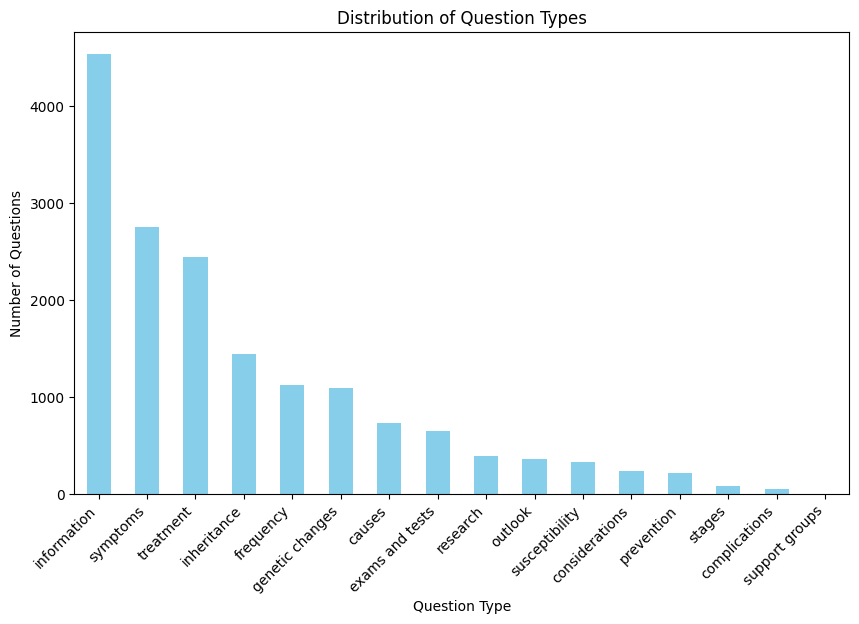

Unique Question Types: ['susceptibility' 'symptoms' 'exams and tests' 'treatment' 'prevention'
 'information' 'frequency' 'complications' 'causes' 'research' 'outlook'
 'considerations' 'inheritance' 'stages' 'genetic changes'
 'support groups']


In [127]:
# Check the unique values in the 'qtype' column
unique_qtypes = df['qtype'].unique()

# Display the distribution of question types
qtype_distribution = df['qtype'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
qtype_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the unique question types
print("Unique Question Types:", unique_qtypes)

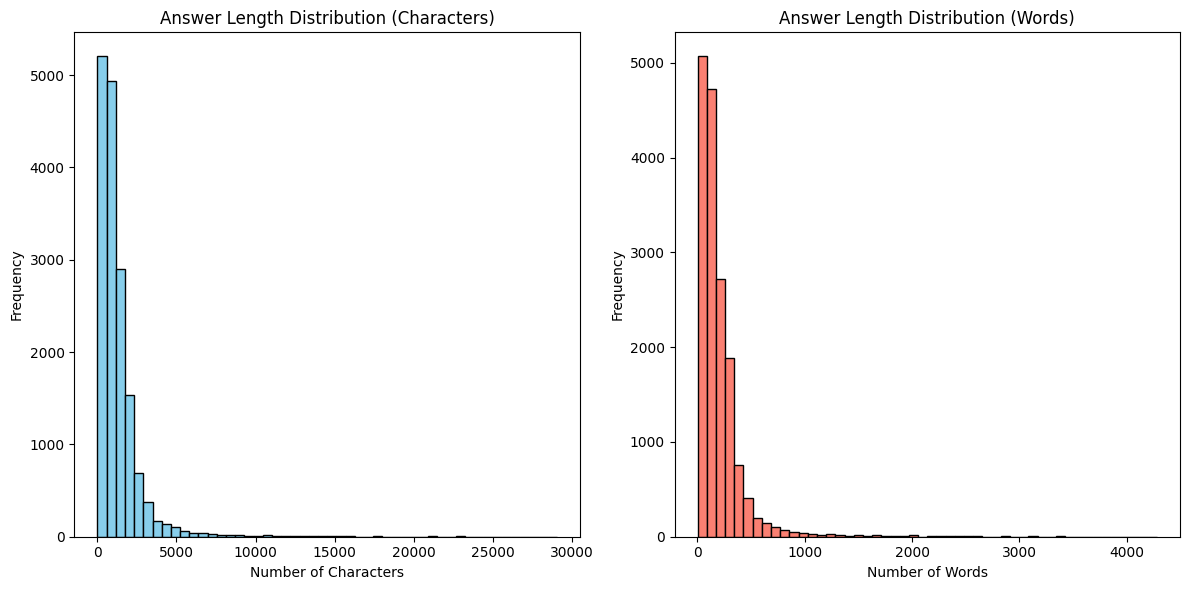

In [128]:
df['Answer_Length_Characters'] = df['Answer'].str.len()

# Calculate the length of each answer in terms of words
df['Answer_Length_Words'] = df['Answer'].str.split().apply(len)

# Visualize the distribution of answer lengths
plt.figure(figsize=(12, 6))

# Subplot for Answer Length in Characters
plt.subplot(1, 2, 1)
plt.hist(df['Answer_Length_Characters'], bins=50, color='skyblue', edgecolor='black')
plt.title('Answer Length Distribution (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Subplot for Answer Length in Words
plt.subplot(1, 2, 2)
plt.hist(df['Answer_Length_Words'], bins=50, color='salmon', edgecolor='black')
plt.title('Answer Length Distribution (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

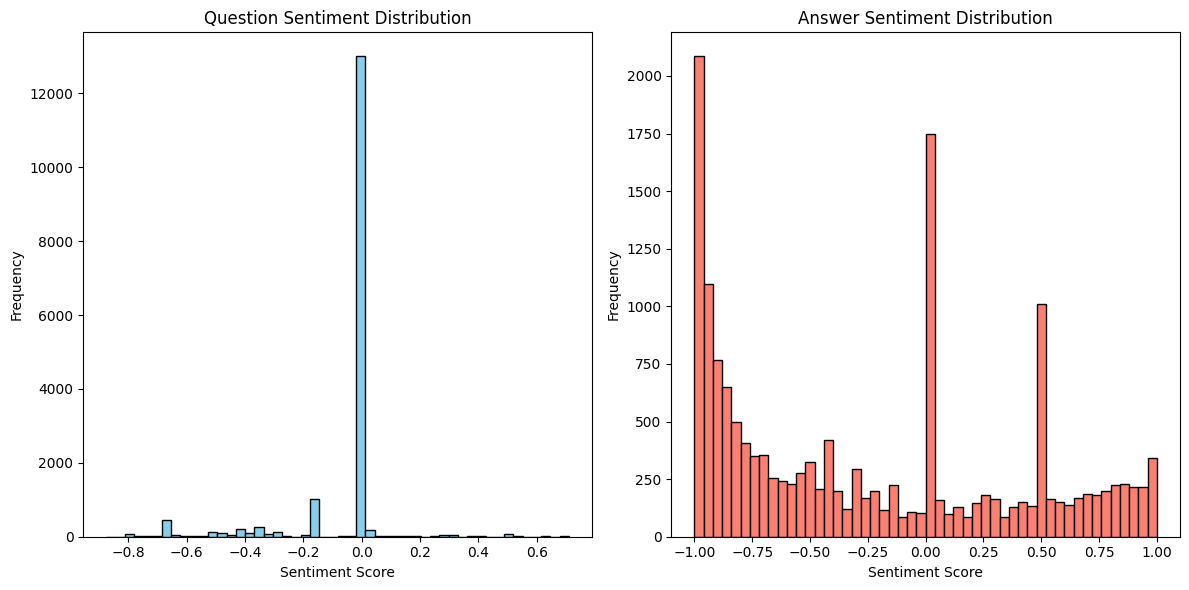

In [130]:

from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to patient questions
df['Question_Sentiment'] = df['Question'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Apply sentiment analysis to expert responses
df['Answer_Sentiment'] = df['Answer'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize the distribution of sentiment scores
plt.figure(figsize=(12, 6))

# Subplot for Question Sentiment
plt.subplot(1, 2, 1)
plt.hist(df['Question_Sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.title('Question Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Subplot for Answer Sentiment
plt.subplot(1, 2, 2)
plt.hist(df['Answer_Sentiment'], bins=50, color='salmon', edgecolor='black')
plt.title('Answer Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


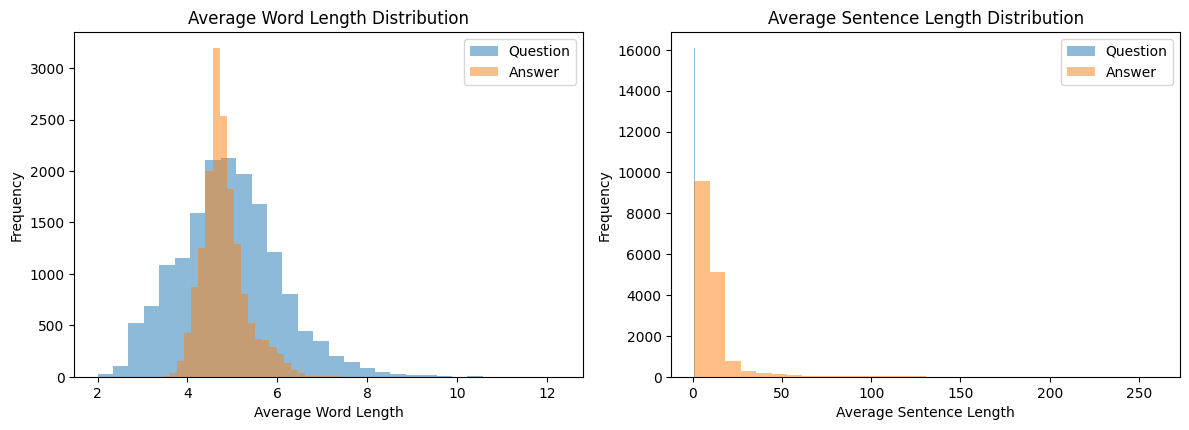

In [131]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


# Function to calculate the average word length
def average_word_length(text):
    words = word_tokenize(text)
    return sum(len(word) for word in words) / len(words)

# Function to calculate the average sentence length
def average_sentence_length(text):
    sentences = sent_tokenize(text)
    return len(sentences)

# Apply the functions to the 'Question' and 'Answer' columns
df['Avg_Word_Length_Question'] = df['Question'].apply(average_word_length)
df['Avg_Sentence_Length_Question'] = df['Question'].apply(average_sentence_length)

df['Avg_Word_Length_Answer'] = df['Answer'].apply(average_word_length)
df['Avg_Sentence_Length_Answer'] = df['Answer'].apply(average_sentence_length)

# Visualize the results
plt.figure(figsize=(12, 8))

# Average Word Length
plt.subplot(2, 2, 1)
plt.hist(df['Avg_Word_Length_Question'], bins=30, alpha=0.5, label='Question')
plt.hist(df['Avg_Word_Length_Answer'], bins=30, alpha=0.5, label='Answer')
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.legend()

# Average Sentence Length
plt.subplot(2, 2, 2)
plt.hist(df['Avg_Sentence_Length_Question'], bins=30, alpha=0.5, label='Question')
plt.hist(df['Avg_Sentence_Length_Answer'], bins=30, alpha=0.5, label='Answer')
plt.title('Average Sentence Length Distribution')
plt.xlabel('Average Sentence Length')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


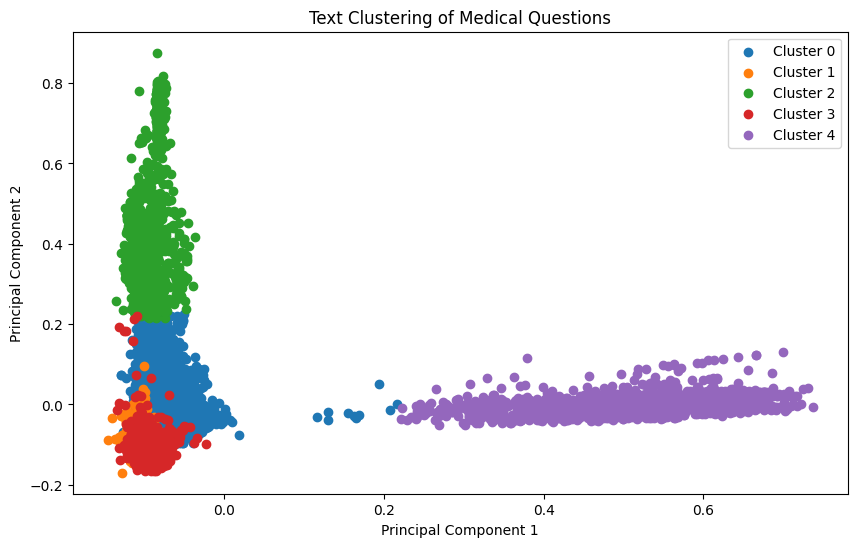

Cluster 0 - Sample Question: Do you have information about Skin Aging

Cluster 1 - Sample Question: What are the treatments for adenosine deaminase deficiency ?

Cluster 2 - Sample Question: Is achromatopsia inherited ?

Cluster 3 - Sample Question: What are the stages of Lip and Oral Cavity Cancer ?

Cluster 4 - Sample Question: What are the symptoms of Radial hypoplasia, triphalangeal thumbs and hypospadias ?



In [132]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine 'Question' and 'Answer' columns for clustering
documents = df['Question'].fillna('') + ' ' + df['Answer'].fillna('')

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Apply K-means clustering
num_clusters = 5  # Adjust the number of clusters based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters in 2D
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('Text Clustering of Medical Questions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Display sample questions from each cluster
for cluster in range(num_clusters):
    sample_question = df[df['Cluster'] == cluster]['Question'].sample(n=1).values[0]
    print(f"Cluster {cluster} - Sample Question: {sample_question}\n")


In [134]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.DataFrame(medic_data)

symptoms_conditions = df['Question'].str.lower().str.split(',').apply(lambda x: [s.strip() for s in x])

# One-hot encode the symptoms and conditions
te = TransactionEncoder()
one_hot_encoded = te.fit(symptoms_conditions).transform(symptoms_conditions)
df_encoded = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [135]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming you have a column named 'Answer' that contains information about treatments
treatments = df['Answer'].dropna().tolist()

# Use TF-IDF Vectorization for text representation
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(treatments)

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 5  # Adjust the number of topics based on your preference
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topic_keywords = []
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]  # Top 10 keywords
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topic_keywords.append(top_keywords)

    print(f"Topic #{topic_idx + 1} Keywords: {', '.join(top_keywords)}")
    print()

# Assign topics to treatments in the dataset
df['Treatment_Topic'] = lda.transform(X).argmax(axis=1)

# Display a sample of treatments with assigned topics
sample_treatments = df[['Answer', 'Treatment_Topic']].sample(10)
print("Sample Treatments with Assigned Topics:")
print(sample_treatments)


Topic #1 Keywords: syndrome, gene, mutations, protein, individuals, cells, affected, brain, cause, symptoms

Topic #2 Keywords: genetic, diagnosis, resources, management, testing, registry, review, medlineplus, counseling, address

Topic #3 Keywords: treatment, blood, cancer, disease, risk, heart, symptoms, people, health, help

Topic #4 Keywords: symptom, frequency, number, patients, 90, information, 25, sign, study, available

Topic #5 Keywords: gene, condition, autosomal, inherited, copy, recessive, pattern, disorder, cell, 000

Sample Treatments with Assigned Topics:
                                                  Answer  Treatment_Topic
2306   Viral gastroenteritis is usually diagnosed bas...                2
5340   An intestinal obstruction occurs when food or ...                2
2626   Signs of childhood ALL include fever and bruis...                2
3767   A week or two after the blisters erupt, the oo...                2
2089   Injury to the blood vessels, nerves, and musc

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


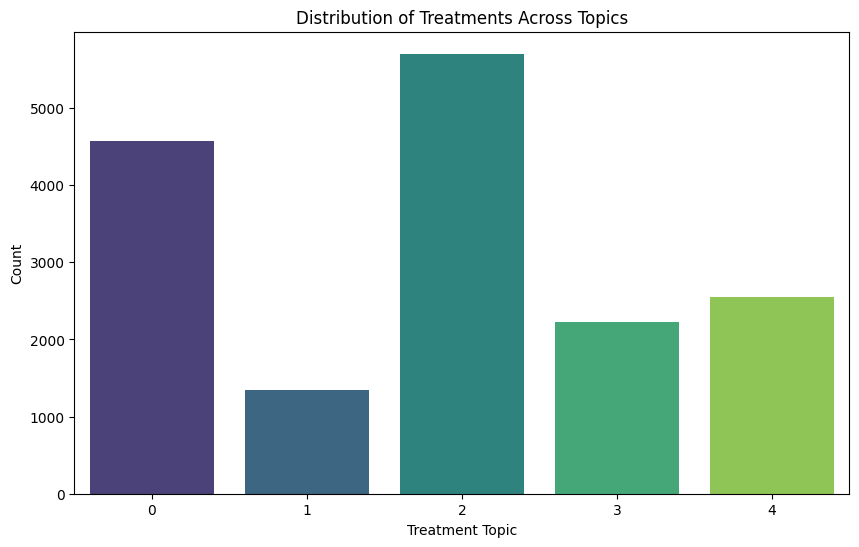

In [136]:
import seaborn as sns# Plot the distribution of treatments across different topics
plt.figure(figsize=(10, 6))
sns.countplot(x='Treatment_Topic', data=df, palette='viridis')
plt.title('Distribution of Treatments Across Topics')
plt.xlabel('Treatment Topic')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


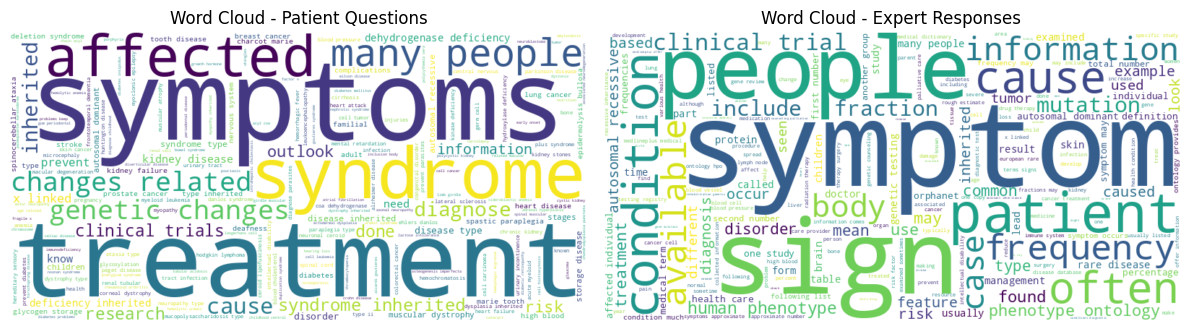

In [137]:
from wordcloud import WordCloud

patient_questions = df['Question'].dropna().str.lower().str.cat(sep=' ')
expert_responses = df['Answer'].dropna().str.lower().str.cat(sep=' ')

# Generate word clouds for patient questions and expert responses
wordcloud_patient = WordCloud(width=800, height=400, background_color='white').generate(patient_questions)
wordcloud_expert = WordCloud(width=800, height=400, background_color='white').generate(expert_responses)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_patient, interpolation='bilinear')
plt.title('Word Cloud - Patient Questions')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_expert, interpolation='bilinear')
plt.title('Word Cloud - Expert Responses')
plt.axis('off')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

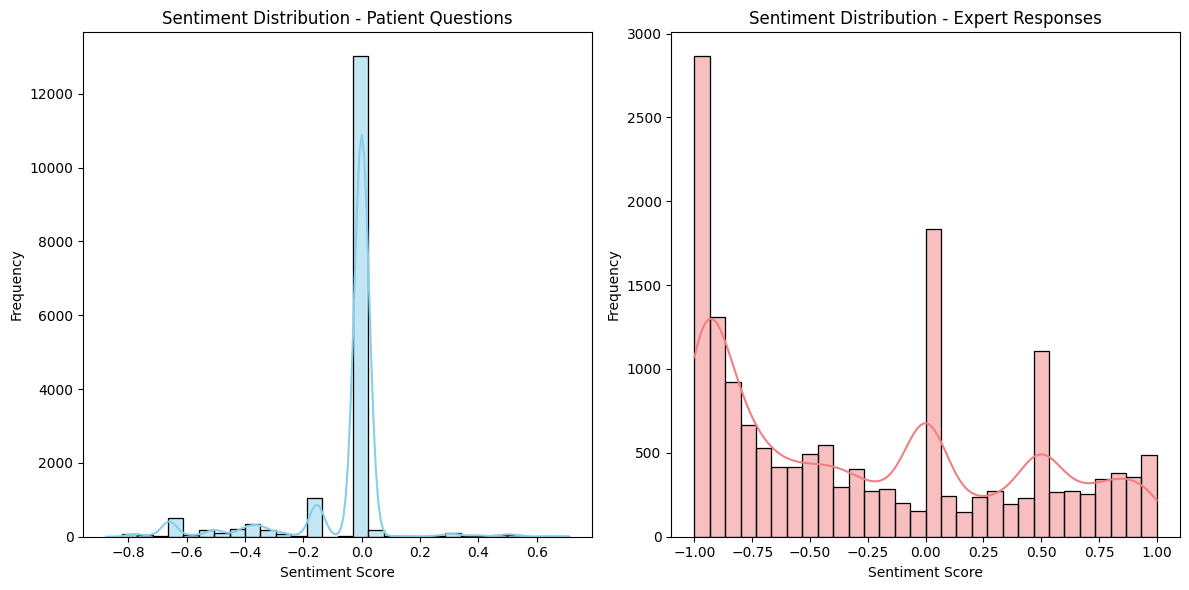

In [138]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

patient_questions = df['Question'].dropna()
expert_responses = df['Answer'].dropna()

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for patient questions and expert responses
patient_questions['Sentiment'] = patient_questions.apply(lambda x: sid.polarity_scores(x)['compound'])
expert_responses['Sentiment'] = expert_responses.apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot sentiment distribution for patient questions and expert responses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(patient_questions['Sentiment'], bins=30, color='skyblue', kde=True)
plt.title('Sentiment Distribution - Patient Questions')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(expert_responses['Sentiment'], bins=30, color='lightcoral', kde=True)
plt.title('Sentiment Distribution - Expert Responses')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

text_data = df['Question'].dropna()

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Tokenize and obtain embeddings for each text
embeddings = []

# tqdm is used here to show a progress bar during the embedding process
for text in tqdm(text_data, desc="Generating BERT Embeddings"):
    tokens = tokenizer(text, return_tensors='pt')
    tokens = {key: val.to(device) for key, val in tokens.items()}
    with torch.no_grad():
        output = model(**tokens)
    embeddings.append(output.pooler_output.cpu().numpy())



In [ ]:
embedding_matrix = torch.from_numpy(np.concatenate(embeddings, axis=0))

# Apply k-means clustering
num_clusters = 5  # Adjust the number of clusters based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(embedding_matrix)

# Add cluster assignments to the original dataframe
df['Cluster'] = cluster_assignments

# Print a sample of the data with cluster assignments
print("Sample of Data with Cluster Assignments:")
print(df[['Question', 'Cluster']].sample(10))

In [ ]:
df['Cluster'] = cluster_assignments

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can change this to 3 for a 3D plot
embedding_pca = pca.fit_transform(embedding_matrix.numpy())

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = embedding_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('BERT Embeddings Clustering')
plt.xlabel('')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = embedding_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Annotate data points with text
for i, text in enumerate(df['Question'].sample(10)):
    plt.annotate(text, (embedding_pca[i, 0], embedding_pca[i, 1]))

plt.title('BERT Embeddings Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [139]:
!pip install -q bitsandbytes==0.39.0 datasets accelerate loralib einops
!pip install -U git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-vqrl9tiv
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-vqrl9tiv
  Resolved https://github.com/huggingface/transformers.git to commit 3cefac1d974db5e2825a0cb2b842883a628be7a0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [140]:
!pip install peft

In [141]:
!pip install accelerate

In [142]:
from huggingface_hub import notebook_login

In [143]:
notebook_login()


/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

In [144]:
import json
import os
from pprint import pprint
import bitsandbytes as bnb
import torch
import torch.nn as nn
import transformers
from datasets import load_dataset
from huggingface_hub import notebook_login
from peft import (
    LoraConfig,
    PeftConfig,
    PeftModel,
    get_peft_model,
    prepare_model_for_kbit_training
)
from transformers import (
    AutoConfig,
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig
)

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
!pip install -q accelerate --upgrade

In [145]:

MODEL_NAME = "GeneZC/MiniChat-1.5-3B"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
#     bnb_4bit_use_double_quant=True,
#     load_in_8bit_fp32_cpu_offload=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    device_map="auto",
    trust_remote_code=True,
    quantization_config=bnb_config
)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_42/2948612510.py", line 12, in <module>
    model = AutoModelForCausalLM.from_pretrained(
  File "/opt/conda/lib/python3.10/site-packages/transformers/models/auto/auto_factory.py", line 566, in from_pretrained
    return model_class.from_pretrained(
  File "/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py", line 2899, in from_pretrained
ImportError: Using `load_in_8bit=True` requires Accelerate: `pip install accelerate` and the latest version of bitsandbytes `pip install -i https://test.pypi.org/simple/ bitsandbytes` or `pip install bitsandbytes`.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in show

In [ ]:

def print_trainable_parameters(model):
  """
  Prints the number of trainable parameters in the model.
  """
  trainable_params = 0
  all_param = 0
  for _, param in model.named_parameters():
    all_param += param.numel()
    if param.requires_grad:
      trainable_params += param.numel()
  print(
      f"trainable params: {trainable_params} || all params: {all_param} || trainables%: {100 * trainable_params / all_param}"
  )

In [ ]:
# model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [ ]:
config = LoraConfig(
    r=16,
    lora_alpha=32,
#     target_modules=["query_key_value"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    
)
# model.add_adapter(peft_config)

# model.add_adapter(config)
model = get_peft_model(model, config)

print_trainable_parameters(model)

In [ ]:
prompt = """
<human>: what can i do to prevent poisoning by marine toxins?
<Assistant>:
""".strip()

In [ ]:
generation_config = model.generation_config
generation_config.max_new_tokens = 2056
generation_config.temperature = 0.4
generation_config.top_p = 0.7
# generation_config.do
generation_config.num_return_sequences = 1
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eos_token_id = tokenizer.eos_token_id

In [ ]:
%%time
device = "cuda:0"

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config
  )

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
print("Outputs Tuple:", outputs)
len(outputs)

In [ ]:
df = pd.DataFrame(medic_data)

In [ ]:

# from datasets import Dataset, DatasetDict

# hf_dataset = Dataset.from_pandas(df)

# # Create a DatasetDict
# train_data = DatasetDict({'train': hf_dataset})

# # Print the DatasetDict information
# print(train_data)

# Model Trained With 10 rows of the dataset


In [ ]:
from datasets import Dataset, DatasetDict

# Take the first 100 rows from the original dataset
subset_df = df.head(500)

# Create a new Hugging Face Dataset
subset_dataset = Dataset.from_pandas(subset_df)

# Create a DatasetDict with the new dataset
train_data = DatasetDict({'train': subset_dataset})

# Print the information about the new DatasetDict
print(train_data)


In [ ]:

train_data["train"][0]

In [ ]:
def generate_prompt(data_point):
    return f"""
    : {data_point["Question"]}
    : {data_point["Answer"]}
    """.strip()

def generate_and_tokenize_prompt(data_point):
    full_prompt = generate_prompt(data_point)
    tokenized_full_prompt = tokenizer(full_prompt, padding=True, truncation=True)
    return tokenized_full_prompt

# Shuffle and apply the function to the training data
train_data_transformed = train_data["train"].shuffle().map(generate_and_tokenize_prompt)

# Print the transformed dataset
print(train_data_transformed)

In [ ]:
# !pip install bitandbytes==0.37.0

In [ ]:
training_args = transformers.TrainingArguments(
      per_device_train_batch_size=4, #change it to 8 after or 16 
      gradient_accumulation_steps=4, #4
      num_train_epochs=6,
      learning_rate=2e-4,
      fp16=True,
      save_total_limit=3,
      logging_steps=500,
      output_dir="experiments",
      optim="paged_adamw_8bit",
      lr_scheduler_type="cosine",
      warmup_ratio=0.05,
      push_to_hub=True,
)

In [ ]:
trainer = transformers.Trainer(
    model=model,
    train_dataset=train_data_transformed,
    args=training_args,
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)
)
model.config.use_cache = False

In [ ]:
trainer.train()

In [ ]:
# model.config.use_cache = False

In [ ]:
# trainer.train()

In [ ]:
model.save_pretrained("trained-model")


In [ ]:
PEFT_MODEL = "rajveer43/MiniMedicXpert"

model.push_to_hub(
    PEFT_MODEL, use_auth_token=True
)
trainer.push_to_hub(PEFT_MODEL)

In [ ]:
import shutil

# Assuming your model is saved in the 'trained-model' directory
trained_model_path = "/kaggle/working/trained-model"

# Zip the trained model directory
shutil.make_archive(trained_model_path, 'zip', trained_model_path)


In [ ]:
model.push_to_hub(
    PEFT_MODEL
)

In [ ]:
config = PeftConfig.from_pretrained(PEFT_MODEL)
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    return_dict=True,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

tokenizer=AutoTokenizer.from_pretrained(config.base_model_name_or_path)
tokenizer.pad_token = tokenizer.eos_token

model = PeftModel.from_pretrained(model, PEFT_MODEL)

In [ ]:

generation_config = model.generation_config
generation_config.max_new_tokens = 2056
generation_config.temperature = 0.4
generation_config.top_p = 0.7
generation_config.num_return_sequences = 2
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eos_token_id = tokenizer.eos_token_id


In [ ]:
%%time
device = "cuda:0"

prompt = """
<human>: what can i do to prevent poisoning by marine toxins?\n
<Assistant<:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config,
      num_return_sequences=1,
  )

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
%%time
device = "cuda:0"

prompt = """
<Human>: what are the symptoms of cancer?
<Assistant>:
""".strip()

encoding = tokenizer(prompt, return_tensors="pt").to(device)
with torch.inference_mode():
  outputs = model.generate(
      input_ids = encoding.input_ids,
      attention_mask = encoding.attention_mask,
      generation_config = generation_config,
      num_return_sequences=1,

  )



In [ ]:
tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import shutil

# Zip the trained model directory
shutil.make_archive("/kaggle/working/trained", 'zip', "/kaggle/working/trained-model")

# Zip the experiments directory
shutil.make_archive("/kaggle/working/experiments", 'zip', "/kaggle/working/experiments")


In [ ]:
model

In [ ]:
import shutil
import os

# Assuming your model is saved in the 'trained-model' directory
trained_model_path = "/kaggle/working/trained_model"

# Specify the destination zip file path
zip_file_path = "/kaggle/working/trained_model.zip"

# Zip the trained model directory
shutil.make_archive(zip_file_path, 'zip', trained_model_path)

# Check if the zip file was created successfully
if os.path.exists(zip_file_path):
    print(f"Model zipped successfully. Downloading...")
    
    # Move the file to the output directory for download
    shutil.move(zip_file_path + ".zip", "/kaggle/working/trained-model.zip")
    
    # Provide a download link
    print("Download your trained model: [trained-model.zip](/kaggle/working/trained-model.zip)")
else:
    print("Error zipping the model.")


# Model Train with more number of rows

In [ ]:
# Take the first 100 rows from the original dataset
subset_df = df.head(40)

# Create a new Hugging Face Dataset
subset_dataset = Dataset.from_pandas(subset_df)

# Create a DatasetDict with the new dataset
train_data_40 = DatasetDict({'train': subset_dataset})

# Print the information about the new DatasetDict
train_data_40

In [ ]:

train_data_40["train"][0]

In [ ]:
def generate_prompt(data_point):
    return f"""
    : {data_point["Question"]}
    : {data_point["Answer"]}
    """.strip()

def generate_and_tokenize_prompt(data_point):
    full_prompt = generate_prompt(data_point)
    tokenized_full_prompt = tokenizer(full_prompt, padding=True, truncation=True)
    return tokenized_full_prompt

# Shuffle and apply the function to the training data
train_data_transformed = train_data_40["train"].shuffle().map(generate_and_tokenize_prompt)

# Print the transformed dataset
print(train_data_transformed)

In [ ]:
training_args = transformers.TrainingArguments(
      per_device_train_batch_size=4, #change it to 8 after or 16 
      gradient_accumulation_steps=4, #4
      num_train_epochs=6,
      learning_rate=2e-4,
      fp16=True,
      save_total_limit=3,
      logging_steps=500,
      output_dir="experiments",
      optim="paged_adamw_8bit",
      lr_scheduler_type="cosine",
      warmup_ratio=0.05,
      push_to_hub=True,
)

In [ ]:
trainer = transformers.Trainer(
    model=model,
    train_dataset=train_data_transformed,
    args=training_args,
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)
)
model.config.use_cache = False
trainer.train()

In [ ]:
!pip install gradio==3.48.0

In [ ]:
# !pip install peft
# !pip install gradio
# Gaia MiniMed⚕️🦅Falcon Chat

from transformers import AutoConfig, AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel, PeftConfig
import torch
import gradio as gr
import json
import os
import shutil
import requests

# Define the device
device = "cuda" if torch.cuda.is_available() else "cpu"
#Define variables 
temperature=0.4
max_new_tokens=240
top_p=0.92
repetition_penalty=1.7
max_length=2048

# Use model IDs as variables
base_model_id = "GeneZC/MiniChat-1.5-3B"
model_directory = "rajveer43/MiniMedicXpert"

# Instantiate the Tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model_id, trust_remote_code=True, padding_side="left")
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'


# Load the GaiaMiniMed model with the specified configuration
# Load the Peft model with a specific configuration
# Specify the configuration class for the model
model_config = AutoConfig.from_pretrained(base_model_id)
# Load the PEFT model with the specified configuration
peft_model = AutoModelForCausalLM.from_pretrained(model_directory, config=model_config)
peft_model = PeftModel.from_pretrained(peft_model, model_directory)



# Class to encapsulate the Falcon chatbot
class MiniChatBot:
    def __init__(self, system_prompt="You are an expert medical analyst:"):
        self.system_prompt = system_prompt

    def process_history(self, history):
        if history is None:
            return []
        
        # Ensure that history is a list of dictionaries
        if not isinstance(history, list):
            return []
        
        # Filter out special commands from the history
        filtered_history = []
        for message in history:
            if isinstance(message, dict):
                user_message = message.get("user", "")
                assistant_message = message.get("assistant", "")
                # Check if the user_message is not a special command
                if not user_message.startswith("MiniChat:"):
                    filtered_history.append({"user": user_message, "assistant": assistant_message})
        return filtered_history

    def predict(self, user_message, assistant_message, history, temperature=0.4, max_new_tokens=700, top_p=0.99, repetition_penalty=1.9):

        # Process the history to remove special commands
        processed_history = self.process_history(history)
        # Combine the user and assistant messages into a conversation
        conversation = f"{self.system_prompt}\nMiniChat: {assistant_message if assistant_message else ''} User: {user_message}\MiniChat:\n"
        # Encode the conversation using the tokenizer
        input_ids = tokenizer.encode(conversation, return_tensors="pt", add_special_tokens=False)
        # Generate a response using the Falcon model
        response = peft_model.generate(input_ids=input_ids, max_length=max_length, use_cache=False, early_stopping=False, bos_token_id=peft_model.config.bos_token_id, eos_token_id=peft_model.config.eos_token_id, pad_token_id=peft_model.config.eos_token_id, temperature=0.4, do_sample=True)
        # Decode the generated response to text
        response_text = tokenizer.decode(response[0], skip_special_tokens=True)
        # Append the Falcon-like conversation to the history
        self.history.append(conversation)
        self.history.append(response_text)
         
        return response_text


# Create the Falcon chatbot instance
minichat_bot = MiniChatBot()

# Define the Gradio interface
title = "👋🏻Welcome to Rajveer'ss 🦅MiniChat-1.5-3B Medical👨🏻‍⚕️Expert Chat🚀"
description = "You can use this Space to test out the MiniMedic model [(rajveer43/MiniMedic)](https://huggingface.co/Rajveer43/MiniMedic) or duplicate this Space and use it locally or on 🤗HuggingFace."

history = [
    {"user": "hi there how can you help me?", "assistant": "Hello, my name is Dr. Wells, I'm created by Rajveer, i can answer questions about medicine and public health!"},
    # Add more user and assistant messages as needed
]
examples = [
    [
        {
            "user_message": "What is the proper treatment for buccal herpes?",
            "assistant_message": "My name is Dr. Wells, I'm a health and sanitation expert ready to answer your medical questions.",
            "history": [],
            "temperature": 0.4,
            "max_new_tokens": 700,
            "top_p": 0.90,
            "repetition_penalty": 1.9,
        }
    ]
]





additional_inputs=[
    gr.Textbox("", label="Optional system prompt"),
    gr.Slider(
        label="Temperature",
        value=0.9,
        minimum=0.0,
        maximum=1.0,
        step=0.05,
        interactive=True,
        info="Higher values produce more diverse outputs",
    ),
    gr.Slider(
        label="Max new tokens",
        value=256,
        minimum=0,
        maximum=3000,
        step=64,
        interactive=True,
        info="The maximum numbers of new tokens",
    ),
    gr.Slider(
        label="Top-p (nucleus sampling)",
        value=0.90,
        minimum=0.01,
        maximum=0.99,
        step=0.05,
        interactive=True,
        info="Higher values sample more low-probability tokens",
    ),
    gr.Slider(
        label="Repetition penalty",
        value=1.2,
        minimum=1.0,
        maximum=2.0,
        step=0.05,
        interactive=True,
        info="Penalize repeated tokens",
    )
]

iface = gr.Interface(
    fn=minichat_bot.predict,
    title=title,
    description=description,
    examples=examples,
    inputs=[
        gr.inputs.Textbox(label="Input Parameters", type="text", lines=5),
    ] + additional_inputs,
    outputs="text",
    theme="ParityError/Anime"
)

# Launch the Gradio interface for the Falcon model
iface.launch()